In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('yelp_reviews_chainness.csv')
# df = df.drop(columns=['Unnamed: 0'])
df.head()

C:\Users\anuja\AppData\Local\Temp\ipykernel_24720\2961215072.py:1: DtypeWarning: Columns (5,7,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('yelp_reviews_chainness.csv')


,Unnamed: 0,id,alias,name,image_url,is_closed,url,review_count,categories,rating,...,qp1,ap_nf,ap,est,city,stabbr,cty_name,walk_scores,normalized_name,cultural_sentiment
0,0,pNbrxyrG5d5QwRsKbu0cXg,46-new-york,46,https://s3-media3.fl.yelpcdn.com/bphoto/PDgpYA...,False,https://www.yelp.com/biz/46-new-york?adjust_cr...,97,"[{'alias': 'desserts', 'title': 'Desserts'}]",4.5,...,3384016.0,G,9403349.0,4574.0,NEW YORK,NY,NEW YORK,99.0,46,0.052778
1,1,8Oo2AtQEPDfxIOnA8wfXoQ,886-new-york,886,https://s3-media3.fl.yelpcdn.com/bphoto/N-V-Dl...,False,https://www.yelp.com/biz/886-new-york?adjust_c...,693,"[{'alias': 'taiwanese', 'title': 'Taiwanese'},...",4.0,...,1908102.0,G,7643447.0,4093.0,NEW YORK,NY,NEW YORK,100.0,886,0.145909
2,2,fNKYBpQJivICm0ORb3nb_Q,8282-new-york-2,8282,https://s3-media2.fl.yelpcdn.com/bphoto/jMQtrS...,False,https://www.yelp.com/biz/8282-new-york-2?adjus...,178,"[{'alias': 'korean', 'title': 'Korean'}]",4.5,...,173596.0,G,902676.0,2667.0,NEW YORK,NY,NEW YORK,88.0,8282,0.277778
3,3,cuqT0Venx12D4bil06J1UA,purnima-halal-brooklyn,Purnima Halal,NaN,False,https://www.yelp.com/biz/purnima-halal-brookly...,1,"[{'alias': 'grocery', 'title': 'Grocery'}]",5.0,...,74247.0,G,329737.0,997.0,BROOKLYN,NY,KINGS,96.0,purnimahalal,0.229004
4,4,Wt306odjwl9oRhN04IMLNw,essen-new-york-5,'ESSEN,https://s3-media4.fl.yelpcdn.com/bphoto/xES9bf...,False,https://www.yelp.com/biz/essen-new-york-5?adju...,126,"[{'alias': 'salad', 'title': 'Salad'}, {'alias...",2.5,...,3455366.0,G,12854197.0,5641.0,NEW YORK,NY,NEW YORK,98.0,essen,0.245189


In [4]:
# Function to normalize names
def normalize_name(name):
    return ''.join(e for e in name if e.isalnum()).lower()

df['normalized_name'] = df['name'].apply(normalize_name)
    
# # Sort DataFrame based on the normalized 'name' column
# df.sort_values(by='normalized_name', inplace=True)

In [5]:
df['review_texts']

0        ['Cash only for transactions under $5. \n\nAma...
1        ['Love that this place kind of mimic the Asian...
2        ["This is a small Korean fusion tapas restaura...
3        ['Wide selection, all clean and new. Welcoming...
4        ['Been coming here for the Udon for years ,\nW...
                               ...                        
21980    ['Exceptional service. She listens but above a...
21981    ["I came here for a family dinner - the decor ...
21982    ['Zyoga is owned by 2 fabulous yoga teachers, ...
21983    ["Loved Loved this place ! Everyone is so nice...
21984    ['The owner is very friendly and workers are v...
Name: review_texts, Length: 21985, dtype: object

In [6]:
from ast import literal_eval
# Handle NaN values before applying literal_eval
def safe_literal_eval(x):
    try:
        return literal_eval(x)
    except (ValueError, SyntaxError):
        return None

df['review_ratings'] = df['review_ratings'].apply(lambda x: safe_literal_eval(x) if pd.notna(x) else [])


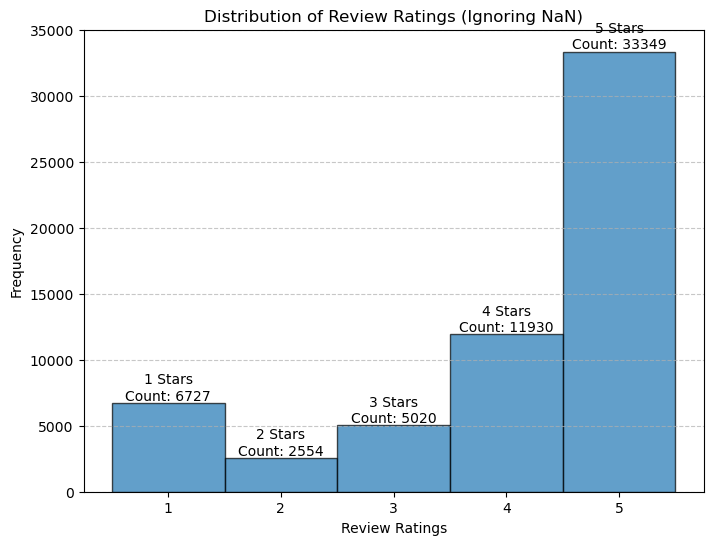

In [7]:


# Flatten the list of review ratings, ignoring NaN entries
flat_ratings = [rating for sublist in df['review_ratings'].dropna() for rating in sublist]
flat_ratings
# Plot the distribution using a histogram
plt.figure(figsize=(8, 6))
plt.hist(flat_ratings, bins=range(1, 7), align='left', edgecolor='black', alpha=0.7)
plt.xlabel('Review Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Review Ratings (Ignoring NaN)')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Count occurrences of each star rating and print labels with counts
rating_counts = pd.Series(flat_ratings).value_counts().sort_index()
for rating, count in rating_counts.items():
    plt.text(rating, count, f'{rating} Stars\nCount: {count}', ha='center', va='bottom')

plt.show()

In [8]:
len(flat_ratings)

59580

In [9]:
df["categories"]

0             [{'alias': 'desserts', 'title': 'Desserts'}]
1        [{'alias': 'taiwanese', 'title': 'Taiwanese'},...
2                 [{'alias': 'korean', 'title': 'Korean'}]
3               [{'alias': 'grocery', 'title': 'Grocery'}]
4        [{'alias': 'salad', 'title': 'Salad'}, {'alias...
                               ...                        
21980    [{'alias': 'florists', 'title': 'Florists'}, {...
21981    [{'alias': 'halal', 'title': 'Halal'}, {'alias...
21982                 [{'alias': 'yoga', 'title': 'Yoga'}]
21983    [{'alias': 'waxing', 'title': 'Waxing'}, {'ali...
21984    [{'alias': 'massage', 'title': 'Massage'}, {'a...
Name: categories, Length: 21985, dtype: object

In [10]:
# Convert the 'categories' strings to actual lists of dictionaries
df['categories'] = df['categories'].apply(lambda x: safe_literal_eval(x) if pd.notna(x) else [])

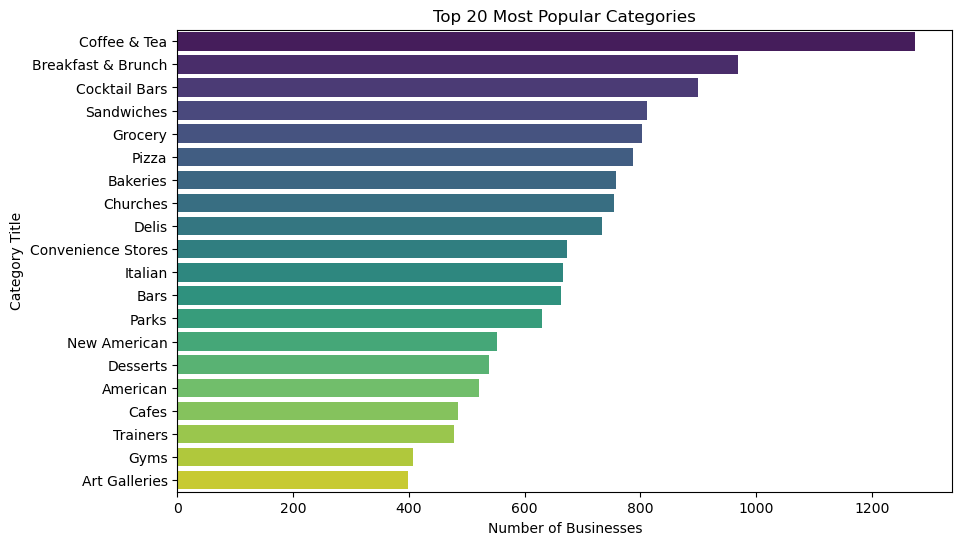

In [11]:
from collections import Counter
# Flatten the list of dictionaries and extract 'title' values
category_titles = [category['title'] for sublist in df['categories'].dropna() for category in sublist]
# category_titles
# Count the occurrences of each category title
category_counts = Counter(category_titles)

# Select the top 10 most popular categories
top_categories = dict(category_counts.most_common(20))

# Plot the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_categories.values()), y=list(top_categories.keys()), palette="viridis")
plt.xlabel('Number of Businesses')
plt.ylabel('Category Title')
plt.title('Top 20 Most Popular Categories')
plt.show()

In [12]:
import pandas as pd
from textblob import TextBlob
from ast import literal_eval
df['review_texts'] = df['review_texts'].apply(lambda x:literal_eval(x) if pd.notna(x) else [])

In [13]:

df['review_texts'][0]


['Cash only for transactions under $5. \n\nAmazing soy milk and red bean buns (豆沙包)! 6-pack of buns for $7. \n\nTo prepare them, I simply splashed some water on...',
 'Store is small with the front counter full of sticky rice and rice cakes, etc.; soy milk and frozen items to buy. Behind the counter is steamed soy dessert,...',
 "I'm not a fan of tofu and neither is L so we didn't try the freshly made tofu that other customers came for. I just wanted some grass jelly $3 each for a..."]

In [14]:
# Define keywords related to cultural importance
cultural_keywords = [
    "heritage",
    "tradition",
    "historic",
    "cultural",
    "iconic",
    "symbolic",
    "landmark",
    "legacy",
    "traditional",
    "customs",
    "local",
    "authentic",
    "indigenous",
    "roots",
    "folklore",
    "rituals",
    "ancestral",
    "time-honored",
    "folk",
    "historical",
    "classical",
    "time-tested",
    "vintage",
    "classical",
    "sentimental",
    "artisanal",
    "artisan",
    "craftsmanship",
    "artisanal",
    "handmade",
    "classic",
    "traditional",
    "antique",
    "nostalgic",
    "memory",
    "past",
    "old-world",
    "cultural heritage",
    "vintage",
    "historical",
    "time-honored",
    "provincial",
    "enduring",
    "local culture",
    "age-old",
    "ageless",
    "rooted",
    "established",
    "cherished",
    "ancient"
]

# Calculate sentiment score for cultural importance
def calculate_cultural_sentiment(reviews):
    if reviews and isinstance(reviews, list):
        combined_text = " ".join(reviews)
        blob = TextBlob(combined_text)
        sentiment_score = blob.sentiment.polarity
        # Check for the presence of cultural keywords
        for keyword in cultural_keywords:
            if keyword in combined_text.lower():
                sentiment_score += 0.2  # Adjust the weight based on your preference
        return sentiment_score
    return None

# Apply the function to calculate cultural sentiment score
df['cultural_sentiment'] = df['review_texts'].apply(calculate_cultural_sentiment)

# Display the modified DataFrame
print(df[['review_texts', 'cultural_sentiment']])

                                            review_texts  cultural_sentiment
0      [Cash only for transactions under $5. \n\nAmaz...            0.052778
1      [Love that this place kind of mimic the Asian ...            0.145909
2      [This is a small Korean fusion tapas restauran...            0.277778
3      [Wide selection, all clean and new. Welcoming ...            0.229004
4      [Been coming here for the Udon for years ,\nWh...            0.245189
...                                                  ...                 ...
21980  [Exceptional service. She listens but above al...            0.294048
21981  [I came here for a family dinner - the decor o...            0.331597
21982  [Zyoga is owned by 2 fabulous yoga teachers, D...            0.100000
21983  [Loved Loved this place ! Everyone is so nice ...            0.372843
21984  [The owner is very friendly and workers are ve...            0.567500

[21985 rows x 2 columns]


In [15]:
# df = df.drop(columns=['sentiment'])
df.to_csv("yelp_reviews_chainness.csv")

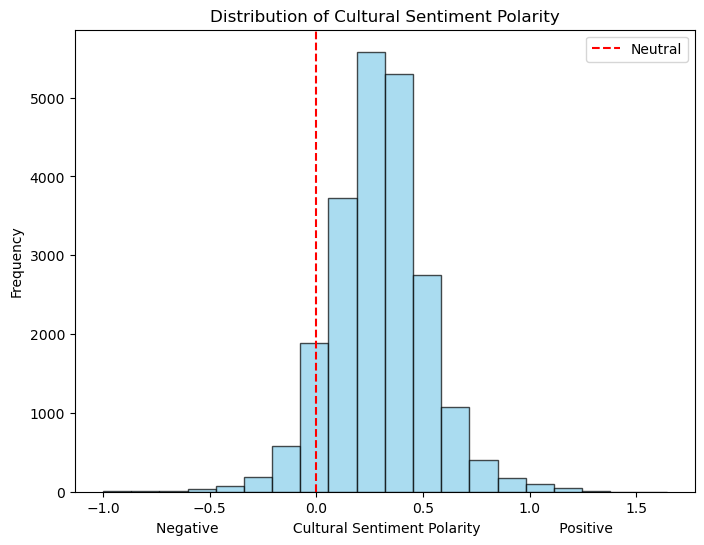

In [16]:
# Plot the histogram of sentiment values with lines for neutrality, positive, and negative
plt.figure(figsize=(8, 6))
plt.hist(df['cultural_sentiment'].dropna(), bins=20, edgecolor='black', color='skyblue', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Neutral')
# plt.axvline(x=0.2, color='green', linestyle='--', label='Positive')
# plt.axvline(x=-0.2, color='red', linestyle='--', label='Negative')
plt.xlabel('Negative                 Cultural Sentiment Polarity                  Positive')
plt.ylabel('Frequency')
plt.title('Distribution of Cultural Sentiment Polarity')
plt.legend()
plt.show()

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from ast import literal_eval
import pandas as pd
from itertools import chain

In [18]:
# Zip ratings and texts, filter out rows with a mismatch in counts, and explode the lists into separate rows
exploded_df = df.explode('review_ratings')

# Reset the index
exploded_df = exploded_df.reset_index(drop=True)

# Rename columns
exploded_df.columns

# Display the rearranged DataFrame
# print(exploded_df[:1])
# Separate reviews based on ratings
# positive_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([4, 5])]['text'])
# negative_reviews = ' '.join(exploded_df[exploded_df['rating'].isin([1, 2])]['text'])
# # Generate word clouds
# positive_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(positive_reviews)
# negative_wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(negative_reviews)

# # Plot the word clouds
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.imshow(positive_wordcloud, interpolation='bilinear')
# plt.title('Positive Reviews Word Cloud')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(negative_wordcloud, interpolation='bilinear')
# plt.title('Negative Reviews Word Cloud')
# plt.axis('off')

# plt.show()

Index(['Unnamed: 0', 'id', 'alias', 'name', 'image_url', 'is_closed', 'url',
       'review_count', 'categories', 'rating', 'coordinates', 'transactions',
       'location', 'phone', 'display_phone', 'distance', 'price', 'latitude',
       'longitude', 'zip_codes', 'address', 'review_texts', 'review_ratings',
       'review_times', 'chain_id_cosine', 'chain_id_jaccard',
       'chain_id_levenshtein', 'chain_id_fuzzy', 'chain_count', 'chain_type',
       'chain_avg_dist', 'name_y', 'emp_nf', 'emp', 'qp1_nf', 'qp1', 'ap_nf',
       'ap', 'est', 'city', 'stabbr', 'cty_name', 'walk_scores',
       'normalized_name', 'cultural_sentiment'],
      dtype='object')

In [19]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Download the NLTK stop words
nltk.download('stopwords')

# Get the stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\anuja\AppData\Local\Temp\ipykernel_24720\1913745629.py:15: DtypeWarning: Columns (6,8,14,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("yelp_reviews_chainness.csv")


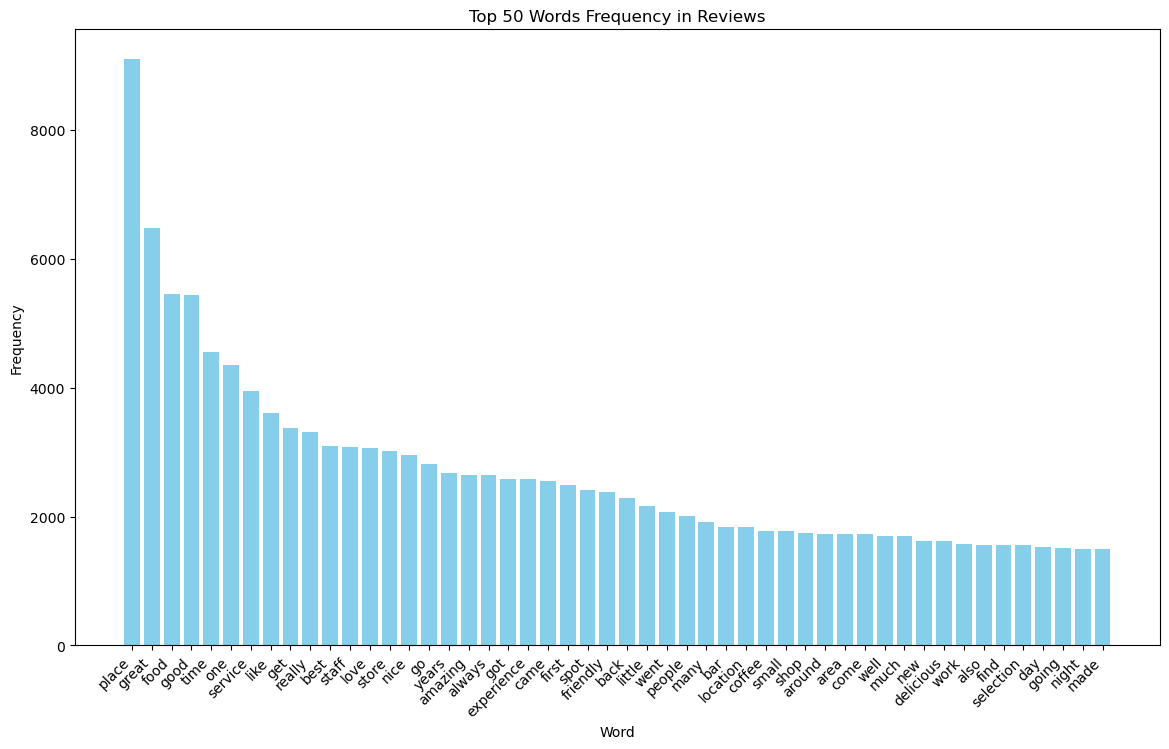

place: a point located with respect to surface features of some region
great: a person who has achieved distinction and honor in some field
food: any substance that can be metabolized by an animal to give energy and build tissue
good: benefit
time: an instance or single occasion for some event
one: the smallest whole number or a numeral representing this number
service: work done by one person or group that benefits another
like: a similar kind; ,
get: a return on a shot that seemed impossible to reach and would normally have resulted in a point for the opponent
really: in accordance with truth or fact or reality
best: the supreme effort one can make
staff: personnel who assist their superior in carrying out an assigned task
love: a strong positive emotion of regard and affection
store: a mercantile establishment for the retail sale of goods or services
nice: a city in southeastern France on the Mediterranean; the leading resort on the French Riviera
go: a time for working (after which

In [44]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Read data from CSV file
df = pd.read_csv("yelp_reviews_chainness.csv")

df['review_texts'].head()

# Combine all reviews into a single string
all_reviews = ' '.join([reviews for reviews in df['review_texts']])


# Define a function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

# Define a function to get WordNet synsets for each word
def get_synsets(tokens):
    synsets = [wordnet.synsets(token) for token in tokens]
    return synsets

# Tokenize and remove stopwords
tokens = word_tokenize(all_reviews)
filtered_tokens = remove_stopwords(tokens)

# Get WordNet synsets
synsets = get_synsets(filtered_tokens)

filtered_tokens_with_synsets = [token for token, synsets_for_token in zip(filtered_tokens, synsets) if synsets_for_token]

# Count the frequency of each word
word_counts = Counter(filtered_tokens_with_synsets)

# Plot the top 50 words along with their WordNet synsets
top_words = word_counts.most_common(50)

labels, values = zip(*top_words)

plt.figure(figsize=(14, 8))
plt.bar(labels, values, color='skyblue')
plt.title('Top 50 Words Frequency in Reviews')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Print WordNet synsets for the top 50 words
for word, _ in top_words:
    synsets_for_word = wordnet.synsets(word)
    if synsets_for_word:
        print(f"{word}: {synsets_for_word[0].definition()}")
#     else:
#         print(f"{word}: No WordNet synsets found")


In [45]:
df= pd.read_csv("yelp_significance_scores.csv")
df

,id,name,review_count,rating,price,zip_codes,latitude,longitude,walk_scores,chain_count,...,qp1,ap_nf,ap,est,cultural_sentiment,cluster,emp_avg_pay,emp_per_est,revenue_per_est,significance_score
0,NScAbTbcDk3WG_osP1qP9w,Love Swimming,0.000000,1.138802,0.00,10282,40.716605,-74.010929,0.914894,0.000000,...,3380584.0,J,5726907.0,105.0,1.000000,3,0.478299,0.245930,0.935404,3.574526
1,r_xoTdO17fhLTtTRDEA3dg,The Rink at Brookfield Place,0.002293,-0.616552,0.00,10285,40.713052,-74.015483,0.744681,0.000000,...,522773.0,J,1399361.0,24.0,0.388258,0,0.110718,1.000000,1.000000,3.242243
2,n1KP9xA13k97DelFyByrbg,Macchiato Espresso Bar,0.005766,-0.616552,0.25,10103,40.760191,-73.976823,0.744681,0.011905,...,1770435.0,J,3223575.0,58.0,0.395313,3,1.000000,0.121705,0.953196,3.199434
3,HV5DMBmEpQ_Nu6NSekJquA,Harry's Italian,0.018282,-0.616552,0.50,10282,40.715376,-74.013984,0.914894,0.011905,...,3380584.0,J,5726907.0,105.0,0.631718,3,0.478299,0.245930,0.935404,3.183068
4,L5eqJRy8Yx_4El6rUxWmBw,El Vez Burrito Bar,0.010353,-0.031434,0.50,10282,40.714736,-74.015635,0.914894,0.000000,...,3380584.0,J,5726907.0,105.0,0.541667,3,0.478299,0.245930,0.935404,3.115868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19447,L_uwWtvAAsyxv0pnHGYSig,Duane Reade,0.001245,-1.786788,0.50,10001,40.747410,-73.992970,0.978723,1.000000,...,4401881.0,G,16437815.0,6626.0,-0.657143,1,0.089744,0.048888,0.042133,-0.571518
19448,peS-X5pgYDjIyFJ1UZNgwQ,Duane Reade,0.001245,-1.786788,0.25,10044,40.758773,-73.953335,0.553191,1.000000,...,20774.0,H,86524.0,104.0,-0.142857,1,0.034149,0.032230,0.013842,-0.583309
19449,htJ__NzeIcLo9NzZFoMgzg,Stop & Shop,0.004652,-1.786788,0.50,11360,40.780143,-73.777895,0.212766,0.059524,...,31870.0,G,149203.0,368.0,-0.114015,1,0.022346,0.019269,0.006523,-0.670293
19450,azhrJocJOaUdSXgQcJU31g,7-Eleven,0.000852,-2.371906,0.25,11365,40.744973,-73.776996,0.553191,0.714286,...,89854.0,G,388863.0,799.0,-0.358306,1,0.031270,0.019203,0.007917,-0.831378


In [47]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame

# # Set the Seaborn style
# sns.set(style="whitegrid")

# # Define color mapping for chain_type values
# color_mapping = {0: 'blue', 1: 'orange', 2: 'green'}

# # Create a barplot with 'significance_score' and colored by 'chain_type'
# plt.figure(figsize=(10, 6))
# sns.barplot(x=df.index, y='significance_score', data=df, hue='chain_type', palette=color_mapping)

# # Set the legend
# legend_labels = {0: 'Independent Business', 1: 'Local Chain', 2: 'National Chain'}
# plt.legend(title='Chain Type', labels=[legend_labels[key] for key in sorted(legend_labels.keys())])

# # Set labels and title
# plt.xlabel('Business Index')
# plt.ylabel('Significance Score')
# plt.title('Significance Score by Chain Type')

# # Show the plot
# plt.show()


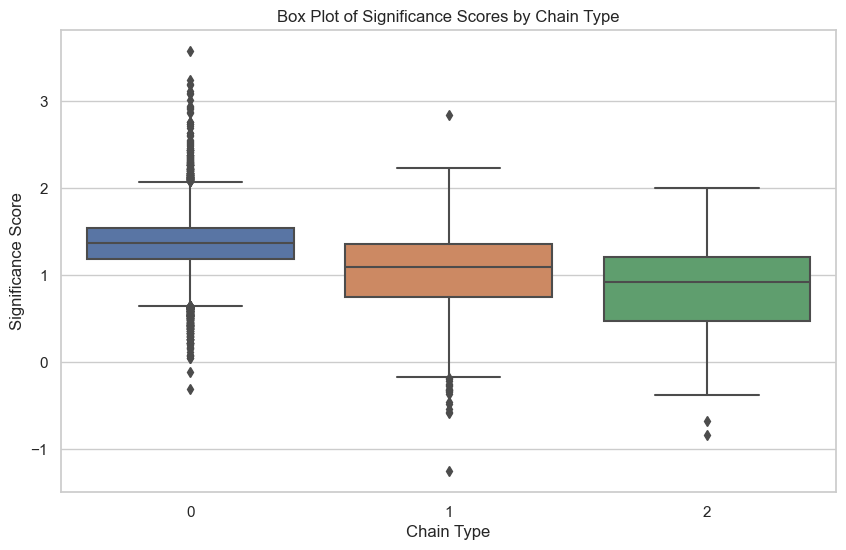

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data from the "yelp_significance_scores.csv" file
df_scores = pd.read_csv("yelp_significance_scores.csv")

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="chain_type", y="significance_score", data=df_scores)
plt.title('Box Plot of Significance Scores by Chain Type')
plt.xlabel('Chain Type')
plt.ylabel('Significance Score')
plt.show()

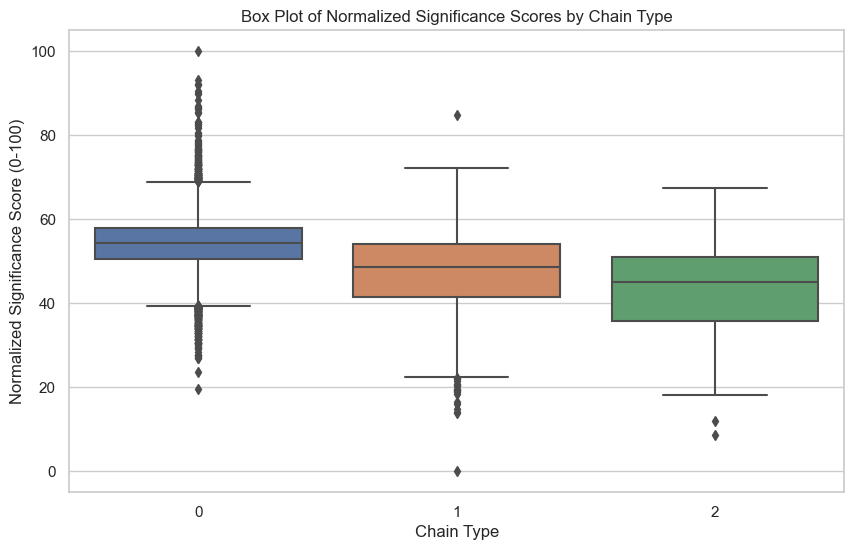

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read data from the "yelp_significance_scores.csv" file
df_scores = pd.read_csv("yelp_significance_scores.csv")

# Normalize the significance scores to a range of 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
df_scores['normalized_score'] = scaler.fit_transform(df_scores[['significance_score']])

# Create a box plot using seaborn with the normalized scores
plt.figure(figsize=(10, 6))
sns.boxplot(x="chain_type", y="normalized_score", data=df_scores)
plt.title('Box Plot of Normalized Significance Scores by Chain Type')
plt.xlabel('Chain Type')
plt.ylabel('Normalized Significance Score (0-100)')
plt.show()

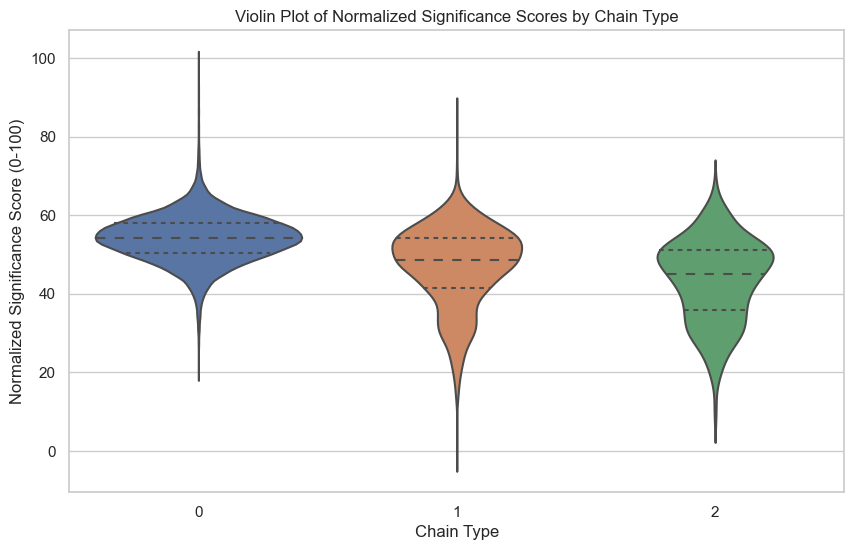

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Read data from the "yelp_significance_scores.csv" file
df_scores = pd.read_csv("yelp_significance_scores.csv")

# Normalize the significance scores to a range of 0-100
scaler = MinMaxScaler(feature_range=(0, 100))
df_scores['normalized_score'] = scaler.fit_transform(df_scores[['significance_score']])

df_scores.to_csv("yelp_significance_scores.csv")

# Create a violin plot using seaborn with the normalized scores
plt.figure(figsize=(10, 6))
sns.violinplot(x="chain_type", y="normalized_score", data=df_scores, inner="quartile")
plt.title('Violin Plot of Normalized Significance Scores by Chain Type')
plt.xlabel('Chain Type')
plt.ylabel('Normalized Significance Score (0-100)')
plt.show()

In [51]:
# df_scores.to_csv("yelp_significance_scores.csv")

In [52]:
!pip install fuzzywuzzy

Defaulting to user installation because normal site-packages is not writeable


In [56]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from fuzzywuzzy import process

# Read data from the "yelp_significance_scores.csv" file
df_scores = pd.read_csv("yelp_significance_scores.csv")

# List of cafe names
cafe_names= ["Zeppola Bakery",
"Angelina Bakery Times Square",
"Angelina Bakery NYC",
"Broadway Bagel",
"Little Collins",
"Russ & Daughters Cafe",
"Bagels & Schmear",
"John's Coffee Shop",
"Slate Cafe",
"Mille-Feuille Bakery",
"Fiat Cafe",
"Two Hands Nolita",
"Breads Bakery",
"Five Leaves",
"Penelope"]

,Cafe Name,Normalized Score
